In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

In [ ]:
from manim import *

config.media_width = "60%"

Manim Community v0.12.0

In [ ]:
%%manim -v WARNING -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

In [ ]:
%%manim -v WARNING -qm SquareToCirclePink

class SquareToCirclePink(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set the color and transparency
        self.play(Create(circle))  # show the circle on screen

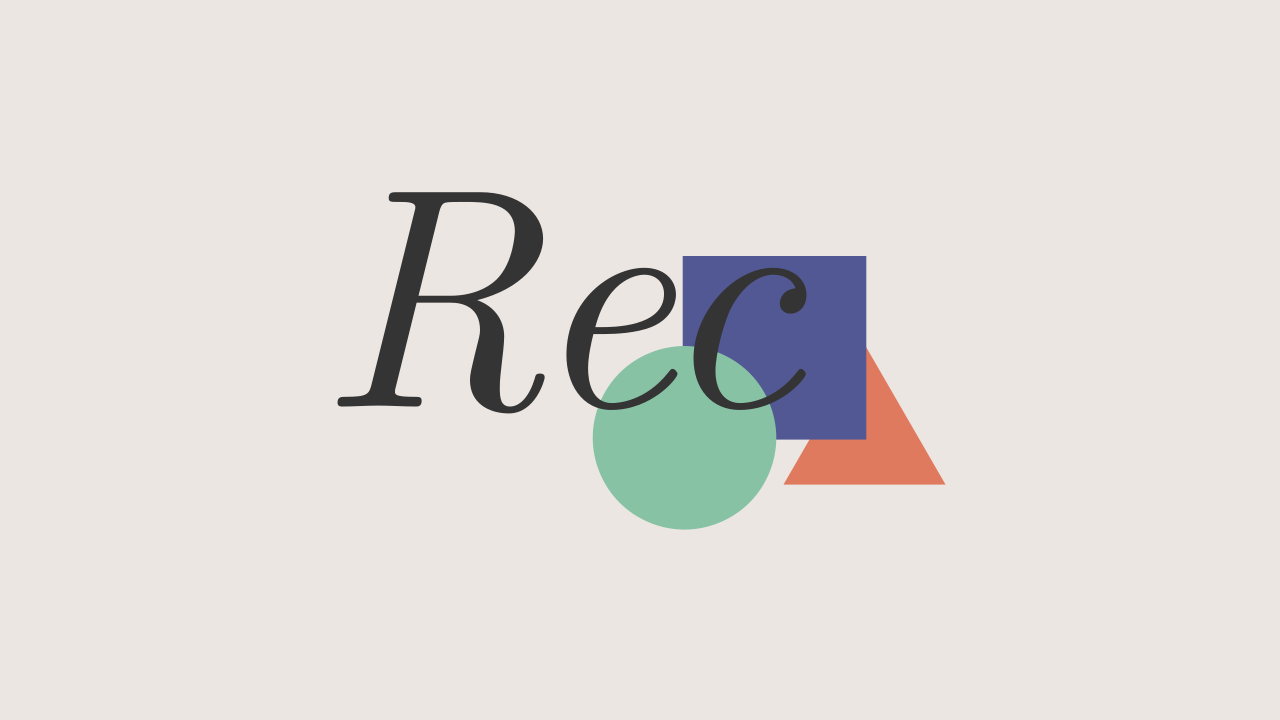

In [ ]:
%%manim -v WARNING -qm CELogo

class CELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{\textit{Rec}}", fill_color=logo_black).scale(7)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

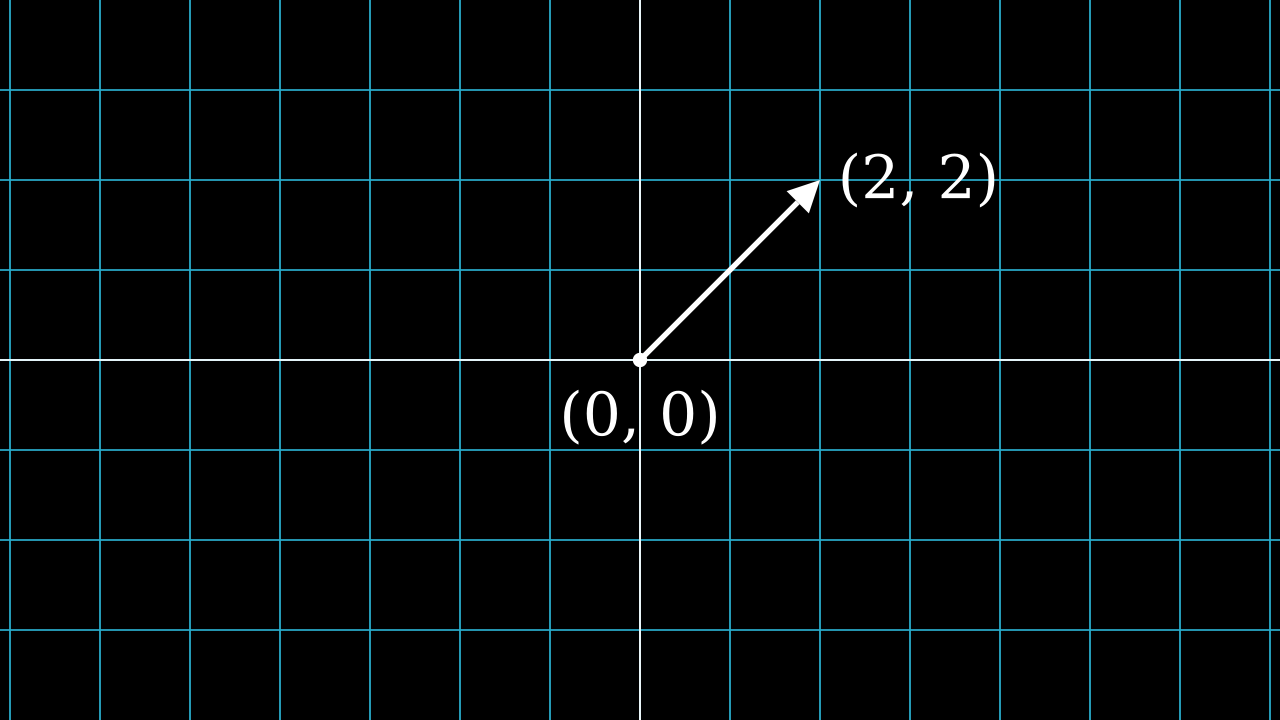

In [ ]:
%%manim -v WARNING -qm VectorArrow

class VectorArrow(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)

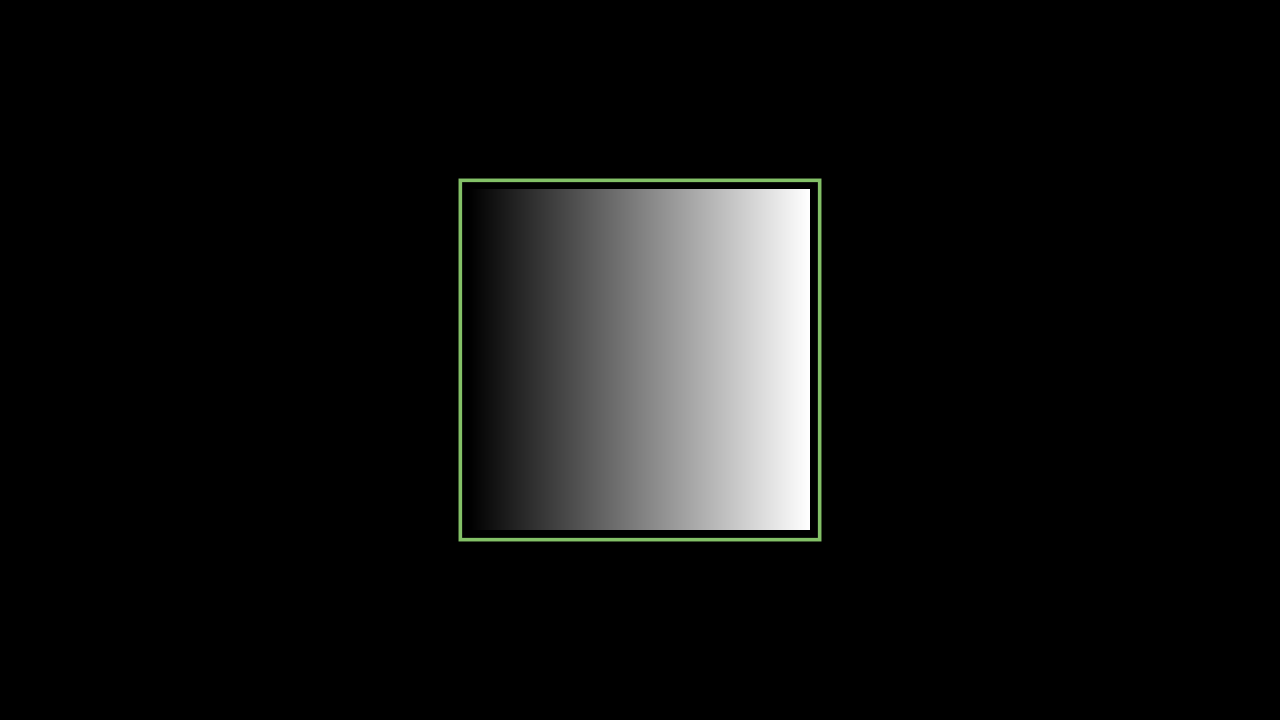

In [ ]:
%%manim -v WARNING -qm GradientImageFromArray

class GradientImageFromArray(Scene):
    def construct(self):
        n = 256
        imageArray = np.uint8(
            [[i * 256 / n for i in range(0, n)] for _ in range(0, n)]
        )
        image = ImageMobject(imageArray).scale(2)
        image.background_rectangle = SurroundingRectangle(image, GREEN)
        self.add(image, image.background_rectangle)

We have encountered the .next_to method, one of many (!) methods that modify Mobjects in one way or the other. But what if we wanted to animate how a Mobject changes when one of these methods is applied, say, when we .shift something around, or .rotate a Mobject, or maybe .scale it? The .animate syntax is the answer to this question, let us look at an example

In [ ]:
%%manim -v WARNING -qm CircleAnnouncement

class CircleAnnouncement(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        announcement = Text("Let us draw a circle.")
        
        self.play(Write(announcement))
        self.wait()
        
        self.play(announcement.animate.next_to(blue_circle, UP, buff=0.5))
        self.play(Create(blue_circle))

New problem: We want to create a scene in which a circle is created while simultaneously some text is written below it.

In [ ]:
%%manim -v WARNING -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

Where we would normally use announcement.next_to(blue_circle, UP, buff=0.5) to position the text without animation, we can prepend .animate to the method call to turn the application of the method into an animation which can then be played using self.play. This works with all methods that modify a Mobject in some way:

In [ ]:
%%manim -v WARNING -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        triangle = Triangle(color=RED, fill_opacity=1)
        self.play(DrawBorderThenFill(triangle))
        self.play(triangle.animate.shift(LEFT))
        self.play(triangle.animate.shift(RIGHT).scale(2))
        self.play(triangle.animate.rotate(PI/3))

In the first play call the triangle is created, in the second it is shifted to the left, then in the third it is shifted back to the right and simultaneously scaled by a factor of 2, and finally in the fourth call it is rotated by an angle of 𝜋/3. Run the cell above again after modifying some of the values, or trying other methods like, e.g., set_color).

When looking closely at the last animation from the scene above, the rotation, you might notice that this is not actually a rotation. The triangle is transformed to a rotated version of itself, but during the animation the vertices of the triangle don't move along an arc (as they would when the triangle was rotated around its center), but rather along straight lines, which gives the animation the impression that the triangle first shrinks a bit and then grows again.

This is actually not a bug, but a consequence of how the .animate syntax works: the animation is constructed by specifying the starting state (the triangle Mobject in the example above), and the final state (the rotated mobject, triangle.rotate(PI/3)). Manim then tries to interpolate between these two, but doesn't actually know that you would like to smoothly rotate the triangle. The following example illustrates this clearly:

In [ ]:
%%manim -v WARNING -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

In [ ]:
%%manim -v WARNING -qm BooleanOperations

class BooleanOperations(Scene):
    def construct(self):
        ellipse1 = Ellipse(
            width=4.0, height=5.0, fill_opacity=0.5, color=BLUE, stroke_width=10
        ).move_to(LEFT)
        ellipse2 = ellipse1.copy().set_color(color=RED).move_to(RIGHT)
        bool_ops_text = MarkupText("<u>Boolean Operation</u>").next_to(ellipse1, UP * 3)
        ellipse_group = Group(bool_ops_text, ellipse1, ellipse2).move_to(LEFT * 3)
        self.play(FadeIn(ellipse_group))

        i = Intersection(ellipse1, ellipse2, color=GREEN, fill_opacity=0.5)
        self.play(i.animate.scale(0.25).move_to(RIGHT * 5 + UP * 2.5))
        intersection_text = Text("Intersection", font_size=23).next_to(i, UP)
        self.play(FadeIn(intersection_text))

        u = Union(ellipse1, ellipse2, color=ORANGE, fill_opacity=0.5)
        union_text = Text("Union", font_size=23)
        self.play(u.animate.scale(0.3).next_to(i, DOWN, buff=union_text.height * 3))
        union_text.next_to(u, UP)
        self.play(FadeIn(union_text))

        e = Exclusion(ellipse1, ellipse2, color=YELLOW, fill_opacity=0.5)
        exclusion_text = Text("Exclusion", font_size=23)
        self.play(e.animate.scale(0.3).next_to(u, DOWN, buff=exclusion_text.height * 3.5))
        exclusion_text.next_to(e, UP)
        self.play(FadeIn(exclusion_text))

        d = Difference(ellipse1, ellipse2, color=PINK, fill_opacity=0.5)
        difference_text = Text("Difference", font_size=23)
        self.play(d.animate.scale(0.3).next_to(u, LEFT, buff=difference_text.height * 3.5))
        difference_text.next_to(d, UP)
        self.play(FadeIn(difference_text))

In [ ]:
%%manim -v WARNING -qm PointMovingOnShapes

class PointMovingOnShapes(Scene):
    def construct(self):
        circle = Circle(radius=1, color=BLUE)
        dot = Dot()
        dot2 = dot.copy().shift(RIGHT)
        self.add(dot)

        line = Line([3, 0, 0], [5, 0, 0])
        self.add(line)

        self.play(GrowFromCenter(circle))
        self.play(Transform(dot, dot2))
        self.play(MoveAlongPath(dot, circle), run_time=2, rate_func=linear)
        self.play(Rotating(dot, about_point=[2, 0, 0]), run_time=1.5)
        self.wait()

In [ ]:
%%manim -v WARNING -qm MovingAngle

class MovingAngle(Scene):
    def construct(self):
        rotation_center = LEFT

        theta_tracker = ValueTracker(110)
        line1 = Line(LEFT, RIGHT)
        line_moving = Line(LEFT, RIGHT)
        line_ref = line_moving.copy()
        line_moving.rotate(
            theta_tracker.get_value() * DEGREES, about_point=rotation_center
        )
        a = Angle(line1, line_moving, radius=0.5, other_angle=False)
        tex = MathTex(r"\theta").move_to(
            Angle(
                line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
            ).point_from_proportion(0.5)
        )

        self.add(line1, line_moving, a, tex)
        self.wait()

        line_moving.add_updater(
            lambda x: x.become(line_ref.copy()).rotate(
                theta_tracker.get_value() * DEGREES, about_point=rotation_center
            )
        )

        a.add_updater(
            lambda x: x.become(Angle(line1, line_moving, radius=0.5, other_angle=False))
        )
        tex.add_updater(
            lambda x: x.move_to(
                Angle(
                    line1, line_moving, radius=0.5 + 3 * SMALL_BUFF, other_angle=False
                ).point_from_proportion(0.5)
            )
        )

        self.play(theta_tracker.animate.set_value(40))
        self.play(theta_tracker.animate.increment_value(140))
        self.play(tex.animate.set_color(RED), run_time=0.5)
        self.play(theta_tracker.animate.set_value(350))

In [ ]:
%%manim -v WARNING -qm MovingGroupToDestination

class MovingGroupToDestination(Scene):
    def construct(self):
        group = VGroup(Dot(LEFT), Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2 * RIGHT)).scale(1.4)
        dest = Dot([4, 3, 0], color=YELLOW)
        self.add(group, dest)
        self.play(group.animate.shift(dest.get_center() - group[2].get_center()))
        self.wait(0.5)

In [ ]:
%%manim -v WARNING -qm ArgMinExample

class ArgMinExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False}
        )
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")

        t = ValueTracker(0)

        def func(x):
            return 2 * (x - 5) ** 2
        graph = ax.plot(func, color=MAROON)

        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)

        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()

        self.add(ax, labels, graph, dot)
        self.play(t.animate.set_value(x_space[minimum_index]))
        self.wait()

In [ ]:
%%manim -v WARNING -qm FollowingGraphCamera

class FollowingGraphCamera(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        # create the axes and the curve
        ax = Axes(x_range=[-1, 10], y_range=[-1, 10])
        graph = ax.plot(lambda x: np.sin(x), color=BLUE, x_range=[0, 3 * PI])

        # create dots based on the graph
        moving_dot = Dot(ax.i2gp(graph.t_min, graph), color=ORANGE)
        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))

        self.add(ax, graph, dot_1, dot_2, moving_dot)
        self.play(self.camera.frame.animate.scale(0.5).move_to(moving_dot))

        def update_curve(mob):
            mob.move_to(moving_dot.get_center())

        self.camera.frame.add_updater(update_curve)
        self.play(MoveAlongPath(moving_dot, graph, rate_func=linear))
        self.camera.frame.remove_updater(update_curve)

        self.play(Restore(self.camera.frame))

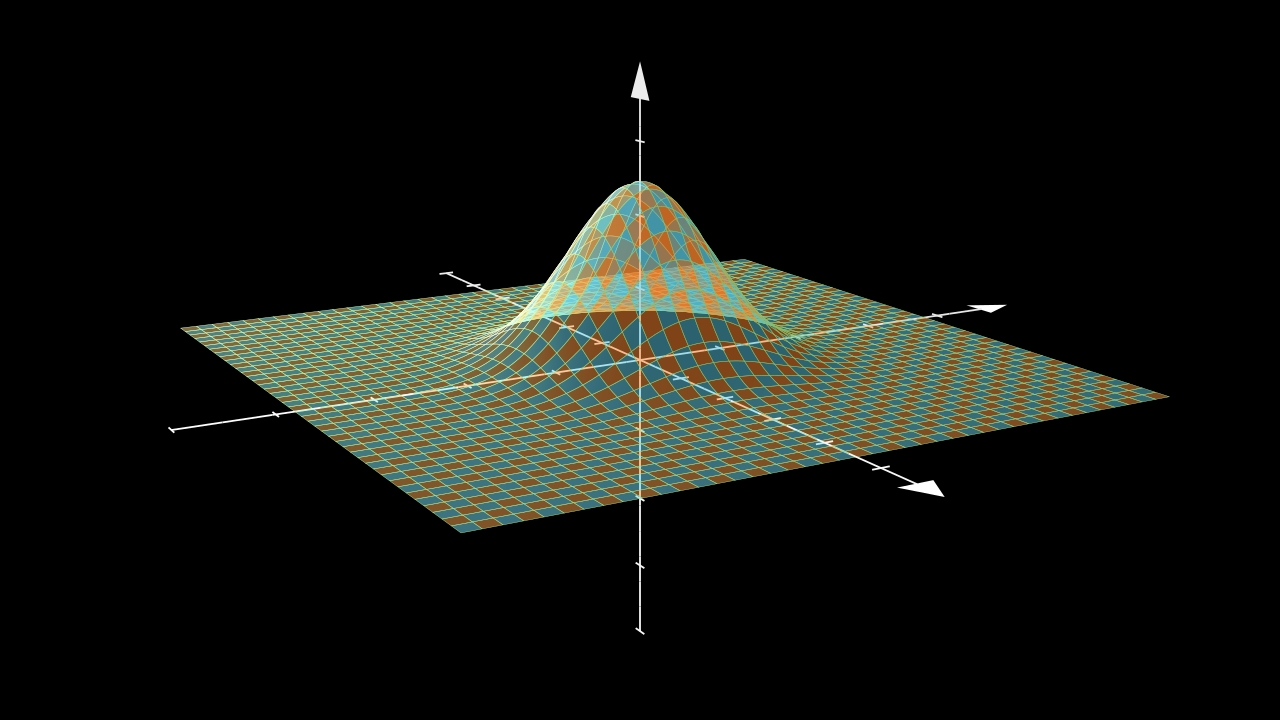

In [ ]:
%%manim -v WARNING -qm ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 42
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)

Manim supports rendering and animating LaTeX, the markup language mathematics is very often typeset in. Here is a simple example for working with LaTeX in Manim:

In [ ]:
%%manim -v WARNING -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

As this example demonstrates, MathTex allows to render simple (math mode) LaTeX strings. If you want to render "normal mode" LaTex, use Tex instead.

Of course, Manim can also help you to visualize transformations of typeset formulae. Consider the following example:

In [ ]:
%%manim -v WARNING -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In [ ]:
%%manim -v WARNING -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

In [ ]:
%%manim -v WARNING -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.get_graph(lambda x: x**n, color=WHITE)
            plots += plot_axes.get_graph(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [ ]:
%%manim -v WARNING -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [ ]:
%%manim -v WARNING -qm CodeFromString

class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.play(Write(rendered_code))
        self.wait(2)

In [ ]:
%%manim -qm -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()